In [27]:
import sys

sys.path.append("/home/zhenhao/TDT")

In [29]:
import compressor

In [30]:
import glob

import compressor.signature

def fracMinHash(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 1000:
        return True
    else:
        return False
        
sg = compressor.signature.FMHSignature(fracMinHash, 12, 12, "/home/zhenhao/TDT/12-mer.pkl")
#signature, storage = sg._find_consensus_in_genus(glob.glob("/home/zhenhao/TDT/data/escherichia/*.fna"))

[INFO]		Seed length set to 12, estimated vocabulary size 8388608.


In [11]:
import numpy as np

pairwise_ANI = np.zeros((len(storage), len(storage)))

for i in range(len(storage)):
    for j in range(i, len(storage)):
        jaccard_index = (storage[i] & storage[j]).sum() / (storage[i] | storage[j]).sum()
        pairwise_ANI[i][j] = pairwise_ANI[j][i] = jaccard_index

(array([  730.,   394., 19646.,  3618.,  2870.,  1652.,  2280.,  2354.,
          226.,   455.]),
 array([0.26702465, 0.34032219, 0.41361972, 0.48691726, 0.56021479,
        0.63351233, 0.70680986, 0.7801074 , 0.85340493, 0.92670247,
        1.        ]),
 <BarContainer object of 10 artists>)

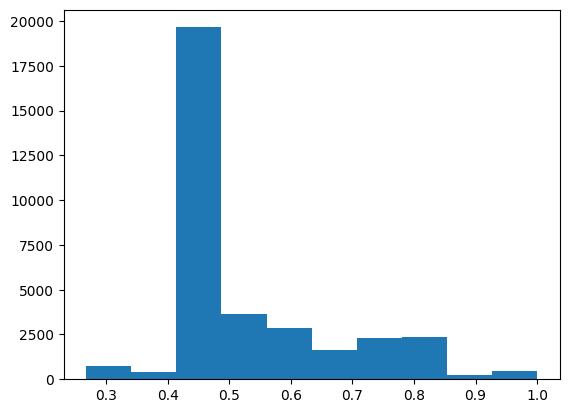

In [15]:
plt.hist(pairwise_ANI.flatten())

In [23]:
len(storage)

185

In [17]:
import matplotlib.pyplot as plt

plt.hist(signature)

0.41859629747937094

In [22]:
(signature > 80).sum()

3289

In [25]:
genus_signature = (signature > 80)

In [24]:
import pickle
with open("escherichia.pkl", "wb") as f:
    pickle.dump(storage, f)

In [26]:
coverage = []

for i in storage:
    coverage.append((i & genus_signature).sum() / genus_signature.sum())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0e24715a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0e2471ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0e2471300>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0e2472020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0e24722c0>],
 'means': []}

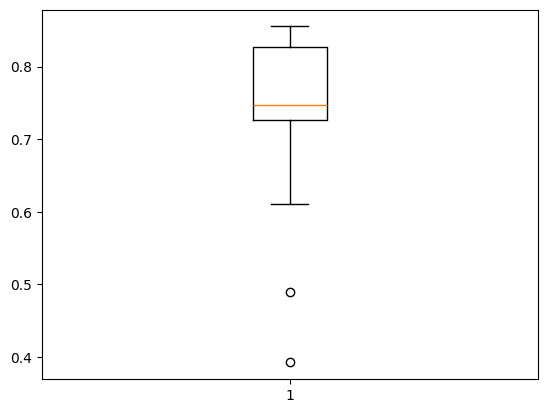

In [28]:
plt.boxplot(coverage)

In [29]:
signature, storage = sg._find_consensus_in_genus(glob.glob("/home/zhenhao/TDT/data/staphylococcus/*.fna"))

  1%|          | 1/98 [00:01<02:48,  1.74s/it]

[0 0 1 ... 1 1 1] 1940


  2%|▏         | 2/98 [00:03<02:47,  1.75s/it]

[0 1 1 ... 1 1 1] 1971


  3%|▎         | 3/98 [00:05<02:43,  1.72s/it]

[0 1 0 ... 0 0 1] 1686


  4%|▍         | 4/98 [00:07<02:59,  1.91s/it]

[1 1 0 ... 1 1 1] 1871


  5%|▌         | 5/98 [00:09<02:54,  1.87s/it]

[0 1 1 ... 0 1 1] 1830


  6%|▌         | 6/98 [00:10<02:46,  1.81s/it]

[0 1 0 ... 1 1 1] 1670


  7%|▋         | 7/98 [00:12<02:44,  1.81s/it]

[0 1 0 ... 1 0 1] 1879


  8%|▊         | 8/98 [00:14<02:39,  1.77s/it]

[0 1 0 ... 1 0 1] 1720


  9%|▉         | 9/98 [00:16<02:42,  1.83s/it]

[0 1 1 ... 1 1 1] 1822


 10%|█         | 10/98 [00:18<03:00,  2.05s/it]

[0 1 0 ... 1 0 1] 1858


 11%|█         | 11/98 [00:20<02:59,  2.07s/it]

[0 1 0 ... 1 1 1] 1829


 12%|█▏        | 12/98 [00:23<03:02,  2.12s/it]

[0 0 1 ... 1 0 1] 1872


 13%|█▎        | 13/98 [00:25<03:02,  2.14s/it]

[1 0 0 ... 0 1 0] 1850


 14%|█▍        | 14/98 [00:27<03:07,  2.23s/it]

[0 0 1 ... 1 1 0] 1653


 15%|█▌        | 15/98 [00:30<03:07,  2.26s/it]

[0 1 0 ... 1 0 1] 1881


 16%|█▋        | 16/98 [00:32<03:02,  2.23s/it]

[0 0 1 ... 1 0 1] 1977


 17%|█▋        | 17/98 [00:34<02:58,  2.21s/it]

[0 0 0 ... 1 0 1] 1804


 18%|█▊        | 18/98 [00:36<02:46,  2.08s/it]

[0 1 0 ... 0 1 1] 1550


 19%|█▉        | 19/98 [00:38<02:45,  2.09s/it]

[0 0 0 ... 1 0 1] 1735


 20%|██        | 20/98 [00:40<02:43,  2.09s/it]

[0 1 0 ... 0 0 1] 1844


 21%|██▏       | 21/98 [00:42<02:42,  2.11s/it]

[0 1 0 ... 1 1 1] 1869


 22%|██▏       | 22/98 [00:45<02:50,  2.24s/it]

[1 1 1 ... 1 0 1] 1929


 23%|██▎       | 23/98 [00:46<02:35,  2.07s/it]

[0 1 0 ... 1 0 1] 1704


 24%|██▍       | 24/98 [00:48<02:32,  2.06s/it]

[0 1 1 ... 1 0 1] 1829


 26%|██▌       | 25/98 [00:50<02:27,  2.02s/it]

[0 1 0 ... 0 0 1] 1830


 27%|██▋       | 26/98 [00:52<02:28,  2.06s/it]

[0 0 1 ... 1 0 1] 1954


 28%|██▊       | 27/98 [00:54<02:23,  2.02s/it]

[0 0 0 ... 0 1 1] 1930


 29%|██▊       | 28/98 [00:56<02:04,  1.78s/it]

[0 1 0 ... 0 1 1] 1251


 30%|██▉       | 29/98 [00:58<02:07,  1.84s/it]

[0 1 0 ... 1 0 1] 1757


 31%|███       | 30/98 [01:00<02:08,  1.89s/it]

[0 1 1 ... 0 1 1] 1783


 32%|███▏      | 31/98 [01:02<02:16,  2.04s/it]

[0 0 0 ... 1 1 1] 1722


 33%|███▎      | 32/98 [01:04<02:14,  2.04s/it]

[0 1 1 ... 0 1 1] 1764


 34%|███▎      | 33/98 [01:07<02:22,  2.19s/it]

[1 0 0 ... 0 1 0] 1645


 35%|███▍      | 34/98 [01:09<02:27,  2.30s/it]

[0 1 1 ... 0 1 1] 1924


 36%|███▌      | 35/98 [01:12<02:27,  2.34s/it]

[0 1 1 ... 1 1 1] 1989


 37%|███▋      | 36/98 [01:14<02:18,  2.23s/it]

[0 0 0 ... 1 1 1] 1792


 38%|███▊      | 37/98 [01:16<02:17,  2.25s/it]

[1 0 1 ... 1 1 1] 1930


 39%|███▉      | 38/98 [01:18<02:12,  2.20s/it]

[0 1 1 ... 0 1 1] 1826


 40%|███▉      | 39/98 [01:20<02:07,  2.17s/it]

[0 1 0 ... 1 0 1] 1728


 41%|████      | 40/98 [01:22<02:02,  2.12s/it]

[0 0 1 ... 0 1 1] 1906


 42%|████▏     | 41/98 [01:24<02:02,  2.14s/it]

[0 1 0 ... 1 1 1] 1862


 43%|████▎     | 42/98 [01:26<01:58,  2.12s/it]

[0 1 1 ... 0 1 1] 1807


 44%|████▍     | 43/98 [01:28<01:51,  2.03s/it]

[1 1 0 ... 1 1 1] 1508


 45%|████▍     | 44/98 [01:30<01:50,  2.04s/it]

[0 1 1 ... 0 1 1] 1812


 46%|████▌     | 45/98 [01:32<01:49,  2.06s/it]

[0 1 0 ... 0 1 0] 1863


 47%|████▋     | 46/98 [01:35<01:52,  2.16s/it]

[0 1 0 ... 1 0 1] 1881


 48%|████▊     | 47/98 [01:37<01:51,  2.19s/it]

[0 0 1 ... 1 1 1] 1853


 49%|████▉     | 48/98 [01:40<01:55,  2.32s/it]

[0 0 0 ... 1 0 1] 1836


 50%|█████     | 49/98 [01:42<01:56,  2.38s/it]

[0 1 1 ... 0 1 1] 1813


 51%|█████     | 50/98 [01:44<01:48,  2.25s/it]

[0 0 0 ... 1 1 1] 1714


 52%|█████▏    | 51/98 [01:46<01:46,  2.26s/it]

[0 1 1 ... 1 1 0] 1919


 53%|█████▎    | 52/98 [01:49<01:43,  2.25s/it]

[0 1 1 ... 0 1 1] 1823


 54%|█████▍    | 53/98 [01:51<01:44,  2.32s/it]

[0 1 1 ... 0 1 1] 1832


 55%|█████▌    | 54/98 [01:53<01:41,  2.31s/it]

[0 1 0 ... 1 0 1] 1720


 56%|█████▌    | 55/98 [01:56<01:41,  2.36s/it]

[0 0 1 ... 1 0 1] 1932


 57%|█████▋    | 56/98 [01:58<01:39,  2.36s/it]

[0 1 1 ... 1 1 1] 1900


 58%|█████▊    | 57/98 [02:01<01:39,  2.43s/it]

[0 1 0 ... 1 0 1] 1916


 59%|█████▉    | 58/98 [02:03<01:32,  2.31s/it]

[0 0 1 ... 1 1 1] 1761


 60%|██████    | 59/98 [02:05<01:33,  2.39s/it]

[1 1 1 ... 1 0 1] 1932


 61%|██████    | 60/98 [02:07<01:26,  2.28s/it]

[0 0 1 ... 1 1 0] 1649


 62%|██████▏   | 61/98 [02:09<01:21,  2.21s/it]

[0 1 0 ... 1 0 1] 1740


 63%|██████▎   | 62/98 [02:12<01:18,  2.19s/it]

[0 1 1 ... 0 1 1] 1759


 64%|██████▍   | 63/98 [02:13<01:09,  2.00s/it]

[0 0 1 ... 0 1 1] 1122


 65%|██████▌   | 64/98 [02:16<01:12,  2.14s/it]

[0 1 0 ... 1 0 1] 1810


 66%|██████▋   | 65/98 [02:18<01:11,  2.17s/it]

[0 0 0 ... 1 0 1] 2020


 67%|██████▋   | 66/98 [02:20<01:11,  2.23s/it]

[0 0 1 ... 0 1 1] 1927


 68%|██████▊   | 67/98 [02:22<01:05,  2.10s/it]

[0 0 0 ... 1 1 1] 1544


 69%|██████▉   | 68/98 [02:24<01:04,  2.14s/it]

[0 1 0 ... 1 1 1] 1671


 70%|███████   | 69/98 [02:26<01:03,  2.18s/it]

[0 1 1 ... 1 0 1] 1831


 71%|███████▏  | 70/98 [02:28<00:58,  2.11s/it]

[0 0 1 ... 1 1 1] 1821


 72%|███████▏  | 71/98 [02:31<00:59,  2.19s/it]

[0 1 0 ... 1 1 1] 1944


 73%|███████▎  | 72/98 [02:33<00:57,  2.20s/it]

[0 0 1 ... 0 0 1] 1981


 74%|███████▍  | 73/98 [02:35<00:54,  2.17s/it]

[0 0 1 ... 1 1 0] 1656


 76%|███████▌  | 74/98 [02:37<00:52,  2.20s/it]

[1 1 1 ... 1 0 1] 1845


 77%|███████▋  | 75/98 [02:39<00:48,  2.12s/it]

[0 0 0 ... 1 1 1] 1716


 78%|███████▊  | 76/98 [02:42<00:48,  2.22s/it]

[1 0 0 ... 0 1 1] 1828


 79%|███████▊  | 77/98 [02:44<00:43,  2.07s/it]

[0 1 1 ... 1 1 1] 1519


 80%|███████▉  | 78/98 [02:46<00:44,  2.23s/it]

[0 1 1 ... 1 0 1] 1941


 81%|████████  | 79/98 [02:48<00:41,  2.19s/it]

[0 0 1 ... 1 1 0] 1629


 82%|████████▏ | 80/98 [02:50<00:38,  2.14s/it]

[0 1 1 ... 0 1 1] 1785


 83%|████████▎ | 81/98 [02:52<00:35,  2.09s/it]

[0 1 0 ... 1 0 1] 1699


 84%|████████▎ | 82/98 [02:54<00:33,  2.07s/it]

[0 0 1 ... 0 1 1] 1943


 85%|████████▍ | 83/98 [02:57<00:33,  2.22s/it]

[0 1 0 ... 1 0 1] 1825


 86%|████████▌ | 84/98 [02:59<00:30,  2.17s/it]

[0 0 0 ... 1 0 1] 1805


 87%|████████▋ | 85/98 [03:01<00:27,  2.10s/it]

[0 1 0 ... 1 1 1] 1722


 88%|████████▊ | 86/98 [03:03<00:26,  2.18s/it]

[0 0 1 ... 0 1 1] 2121


 89%|████████▉ | 87/98 [03:06<00:25,  2.30s/it]

[0 1 1 ... 1 0 1] 1958


 90%|████████▉ | 88/98 [03:08<00:22,  2.25s/it]

[0 1 0 ... 0 0 1] 1676


 91%|█████████ | 89/98 [03:10<00:20,  2.22s/it]

[0 0 0 ... 1 1 1] 1802


 92%|█████████▏| 90/98 [03:12<00:17,  2.14s/it]

[0 1 0 ... 0 1 1] 1765


 93%|█████████▎| 91/98 [03:14<00:14,  2.04s/it]

[0 0 0 ... 0 1 1] 1572


 94%|█████████▍| 92/98 [03:16<00:12,  2.07s/it]

[0 0 0 ... 1 0 1] 1852


 95%|█████████▍| 93/98 [03:18<00:11,  2.22s/it]

[0 1 1 ... 0 1 0] 1937


 96%|█████████▌| 94/98 [03:20<00:08,  2.11s/it]

[0 0 1 ... 1 1 0] 1775


 97%|█████████▋| 95/98 [03:23<00:06,  2.17s/it]

[0 1 0 ... 1 1 1] 1969


 98%|█████████▊| 96/98 [03:25<00:04,  2.14s/it]

[0 1 0 ... 0 0 1] 1756


 99%|█████████▉| 97/98 [03:27<00:02,  2.18s/it]

[0 1 1 ... 1 1 0] 1912


100%|██████████| 98/98 [03:29<00:00,  2.14s/it]

[1 1 0 ... 0 1 1] 1773


In [60]:
staphylococcus_signature = (signature >= 20)

In [61]:
staphylococcus_signature.sum()

3083

In [34]:
with open("escherichia.pkl", "rb") as f:
    es_storage = pickle.load(f)

In [38]:
escherichia_signature = np.zeros(len(es_storage[0]), dtype=np.int16)
for i in es_storage:
    escherichia_signature += i

escherichia_signature = (escherichia_signature > 80)

In [62]:
(escherichia_signature & staphylococcus_signature).sum()

1440

In [63]:
staphylococcus_signature.sum()

3083

In [43]:
escherichia_signature.sum()

3289

In [69]:
coverage = []

for i in range(len(storage)):
    coverage.append((storage[i] & staphylococcus_signature).sum() / storage[i].sum())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0e23cbfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0e23b8520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0e23cbd00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0e23b8a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0e23b8d00>],
 'means': []}

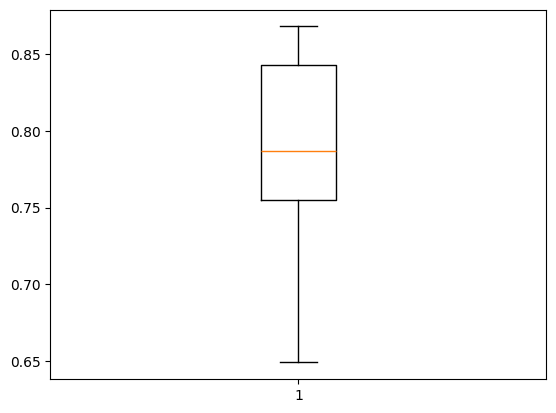

In [70]:
plt.boxplot(coverage)

In [46]:
(es_storage[0] & staphylococcus_signature).sum()

1017

In [71]:
print((es_storage[10] & staphylococcus_signature).sum())
print((es_storage[10] & escherichia_signature).sum())

1393
2799


In [72]:
print((storage[10] & staphylococcus_signature).sum())
print((storage[10] & escherichia_signature).sum())

1334
858


## Try doing classification

In [1]:
import pickle

with open("/home/zhenhao/TDT/signature.pkl", "rb") as f:
    signatures = pickle.load(f)

In [2]:
signatures

[(84107.0, array([ 7,  3,  0, ..., 16, 13, 33], dtype=int16)),
 (1300.0, array([ 34,  40,  30, ..., 131, 119, 132], dtype=int16)),
 (2005525.0, array([13, 34, 18, ..., 66, 65, 65], dtype=int16)),
 (171550.0, array([ 27,  66,  21, ..., 127,  86, 150], dtype=int16)),
 (1843491.0, array([ 55,  60,  33, ..., 164, 143, 158], dtype=int16)),
 (2810280.0, array([15, 13, 11, ..., 45, 36, 42], dtype=int16)),
 (2810281.0, array([4, 5, 4, ..., 8, 7, 8], dtype=int16)),
 (815.0, array([ 71,  89,  36, ..., 175, 140, 173], dtype=int16)),
 (1853231.0, array([19, 18, 27, ..., 35, 35, 34], dtype=int16)),
 (1643824.0, array([ 3,  1,  1, ..., 21, 15, 21], dtype=int16)),
 (1643826.0, array([ 9,  4,  2, ..., 53, 41, 52], dtype=int16)),
 (186803.0, array([ 21,  31,  31, ..., 193, 158, 186], dtype=int16)),
 (186804.0, array([10, 41, 35, ..., 83, 73, 83], dtype=int16)),
 (128827.0, array([ 39,  54,  41, ..., 191, 113, 154], dtype=int16)),
 (31953.0, array([16,  8, 18, ..., 60, 36, 56], dtype=int16)),
 (31977.0,

In [3]:
len(signatures[0][1])

839265

<Axes: ylabel='Count'>

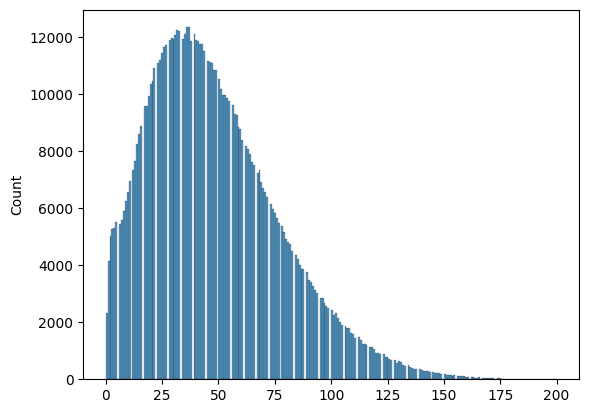

In [12]:
import seaborn

seaborn.histplot(signatures[7][1])

In [13]:
# Read the metadata

import pandas as pd

metadata = pd.read_csv("../gtdb_utils/metadata_sample.csv")

In [14]:
metadata = metadata.dropna(subset=['family_taxid'])

In [15]:
num_kmers = len(signatures[0][1])

In [16]:
import math
from scipy.stats import binom

bool_signature = {}

for genus, signature in signatures:
    # Get the subset of metadata
    metadata_subset = metadata[metadata["family_taxid"] == genus].groupby("species_taxid").sample(1)
    num_sequences = len(metadata_subset)
    if num_sequences > 200:
        num_sequences = 200
    
    # find a good threshold for cutoff
    from scipy.stats import binom
    # find p
    p = signature.sum() / num_sequences / num_kmers
    # find n
    n = num_sequences
    # Set threshold to be p-value=0.05
    print(n, p)
    threshold = math.floor(binom.ppf(0.9, n, p))
    bool_signature[genus] = (signature >= threshold)
    print(bool_signature[genus].sum())

148 0.22464597803644468
214277
200 0.11971832496291397
242483
82 0.25590094584794215
276411
105 0.34753075607823514
276562
76 0.4503707975054614
284542
112 0.06938808489741449
210734
10 0.1591098163273817
193937
200 0.2415299518030658
297438
34 0.2913705304466338
257686
124 0.161791855892339
220780
102 0.2645467795525567
242571
200 0.22719325838680274
288044
103 0.14155037067512669
219564
179 0.16102274512811107
246111
200 0.16669544184494767
251159
147 0.18977853597278246
261643
36 0.36958760873436214
251552
200 0.2015254776500867
254216
145 0.30296338524451916
269691
119 0.3625040257564304
294933
200 0.18092308150584144
279420


In [17]:
import numpy as np

ANI = np.zeros((len(bool_signature), len(bool_signature)))

for i, genus_i in enumerate(bool_signature):
    for j, genus_j in enumerate(bool_signature):
        ANI[i][j] = (bool_signature[genus_i] & bool_signature[genus_j]).sum() / (bool_signature[genus_i] | bool_signature[genus_j]).sum()

In [18]:
ANI

array([[1.        , 0.12544321, 0.18415267, 0.34821433, 0.31580836,
        0.08276712, 0.1043526 , 0.24137287, 0.16167787, 0.45972688,
        0.46883711, 0.19487294, 0.06774021, 0.13482149, 0.43334565,
        0.2148037 , 0.23555514, 0.13322964, 0.39427445, 0.40309546,
        0.3167325 ],
       [0.12544321, 1.        , 0.3868127 , 0.24329303, 0.33042438,
        0.46546015, 0.37972679, 0.38631812, 0.37280083, 0.12157726,
        0.14620118, 0.38340726, 0.45010514, 0.4754239 , 0.15188893,
        0.38753076, 0.33518282, 0.46290166, 0.20120643, 0.2055714 ,
        0.2874827 ],
       [0.18415267, 0.3868127 , 1.        , 0.38624815, 0.45548968,
        0.40860119, 0.35222751, 0.57467833, 0.58985358, 0.165438  ,
        0.2377786 , 0.52585923, 0.35891008, 0.50210429, 0.24356203,
        0.48640682, 0.44969508, 0.49335258, 0.30965365, 0.30991127,
        0.43393632],
       [0.34821433, 0.24329303, 0.38624815, 1.        , 0.4761311 ,
        0.20419309, 0.21137745, 0.48594949, 0.3517189

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37f39273d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37f3927910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37f3927100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37f3927df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37f39340d0>],
 'means': []}

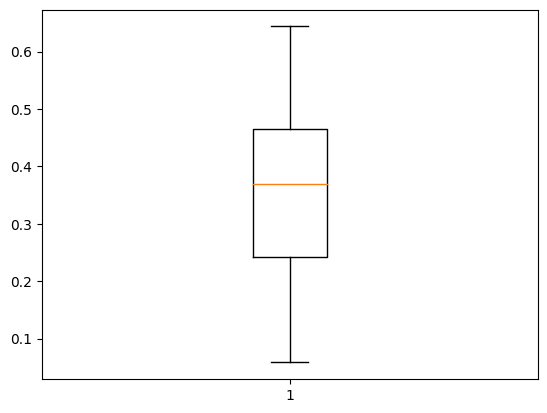

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(ANI[ANI != 1])

In [35]:
from Bio import SeqIO
from tqdm import tqdm
prediction = []

i = 0

for record in tqdm(SeqIO.parse("/mnt/c/Users/zhenh/tax_data/sampled_reads.fastq", "fastq")):
    #print(record.seq)
    record_signature = sg.to_signature([str(record.seq)], data_type=bool)
    print(record_signature.sum(), len(record.seq), "====")

    best_similiarity = 0
    genus_prediction = []
    for genus in bool_signature:
        similarity = (record_signature & bool_signature[genus]).sum() / record_signature.sum()
        if similarity > 0.7:
            genus_prediction.append(genus)
            print(genus, similarity)
            #best_similiarity = similarity
    
    print(genus_prediction)
    
    prediction.append(genus_prediction)
    i += 1
    if i > 20:
        break

6it [00:00, 52.15it/s]

834 8663 ====
2810280.0 0.7482014388489209
186803.0 0.7122302158273381
186804.0 0.7434052757793765
128827.0 0.7745803357314148
31979.0 0.762589928057554
[2810280.0, 186803.0, 186804.0, 128827.0, 31979.0]
197 2129 ====
1300.0 0.7258883248730964
2810280.0 0.8121827411167513
186804.0 0.7766497461928934
128827.0 0.7563451776649747
31979.0 0.7208121827411168
[1300.0, 2810280.0, 186804.0, 128827.0, 31979.0]
379 3852 ====
2810280.0 0.8311345646437994
186803.0 0.7071240105540897
186804.0 0.7493403693931399
128827.0 0.7678100263852242
31979.0 0.7440633245382586
[2810280.0, 186803.0, 186804.0, 128827.0, 31979.0]
620 6186 ====
2810280.0 0.7774193548387097
186804.0 0.7274193548387097
128827.0 0.7612903225806451
31979.0 0.717741935483871
[2810280.0, 186804.0, 128827.0, 31979.0]
69 790 ====
1300.0 0.7391304347826086
2005525.0 0.7246376811594203
2810280.0 0.9130434782608695
2810281.0 0.7101449275362319
815.0 0.7101449275362319
186803.0 0.7101449275362319
186804.0 0.8840579710144928
128827.0 0.8840579

20it [00:00, 58.79it/s]

1853231.0 0.7081081081081081
186803.0 0.772972972972973
186804.0 0.8378378378378378
128827.0 0.8162162162162162
31977.0 0.7027027027027027
31979.0 0.8486486486486486
[1300.0, 2005525.0, 2810280.0, 1853231.0, 186803.0, 186804.0, 128827.0, 31977.0, 31979.0]
89 1004 ====
2810280.0 0.7865168539325843
128827.0 0.7640449438202247
[2810280.0, 128827.0]
56 539 ====
2810280.0 0.75
[2810280.0]
180 1683 ====
2810280.0 0.8333333333333334
186803.0 0.7333333333333333
186804.0 0.7777777777777778
128827.0 0.8222222222222222
31979.0 0.8
[2810280.0, 186803.0, 186804.0, 128827.0, 31979.0]
376 3710 ====
2810280.0 0.800531914893617
186803.0 0.7047872340425532
186804.0 0.726063829787234
128827.0 0.7632978723404256
31979.0 0.7473404255319149
[2810280.0, 186803.0, 186804.0, 128827.0, 31979.0]
71 620 ====
2005525.0 0.7605633802816901
2810280.0 0.7746478873239436
815.0 0.704225352112676
1853231.0 0.704225352112676
186804.0 0.8169014084507042
128827.0 0.7746478873239436
31977.0 0.7183098591549296
31979.0 0.80281

In [41]:
sg._to_signature([str(record.seq)]).sum()

34

In [43]:
metadata

,Unnamed: 0,accession,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,...,ssu_silva_blast_perc_identity,ssu_silva_blast_subject_id,ssu_silva_taxonomy,total_gap_length,trna_aa_count,trna_count,trna_selenocysteine_count,ncbi_genus_taxid,genus_taxid,species_taxid
0,2,RS_GCF_000730125.1,30,100.00,0.92,476,f__Bifidobacteriaceae (UID1462),217,0.0,2212698,...,100,CP008885.1576966.1578495,Bacteria;Actinobacteriota;Actinobacteria;Bifid...,619,19,55,0,1678.0,1678.0,216816
1,4,RS_GCF_000468955.1,0,100.00,0.00,472,o__Lactobacillales (UID543),265,0.0,2107260,...,99.935,CP003157.2105633.2107180,Bacteria;Firmicutes;Bacilli;Lactobacillales;St...,0,19,60,0,1357.0,1357.0,1359
2,22,RS_GCF_001078445.1,7,99.32,0.00,340,o__Clostridiales (UID1342),177,0.0,4662609,...,99.804,CP015399.4748579.4750121,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,32463,19,77,1,2719313.0,2719313.0,1531
3,44,RS_GCF_000273155.1,0,99.26,0.00,492,o__Bacteroidales (UID2657),269,0.0,4834627,...,99.672,AP006841.4735744.4737280,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,14319,19,83,0,816.0,816.0,817
4,50,RS_GCF_000009925.1,0,99.26,0.00,492,o__Bacteroidales (UID2657),269,0.0,4719009,...,100,AP006841.4527043.4528579,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,0,19,74,0,816.0,816.0,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,394902,GB_GCA_930989685.1,0,97.96,0.68,261,o__Clostridiales (UID1212),147,0.0,1974955,...,none,none,none,0,18,41,0,216851.0,216851.0,259315
19814,394904,GB_GCA_934668345.1,0,68.55,0.00,211,p__Actinobacteria (UID2112),124,0.0,1143151,...,none,none,none,0,18,40,1,102106.0,102106.0,165190
19815,394914,GB_GCA_945900725.1,0,92.79,0.68,229,k__Bacteria (UID2982),147,0.0,3994946,...,none,none,none,0,18,37,1,239934.0,239934.0,239935
19816,394919,GB_GCA_021625385.1,0,80.87,0.89,263,o__Clostridiales (UID1212),149,50.0,1358322,...,none,none,none,310,9,16,0,459786.0,459786.0,1945593


In [36]:
bool_matrix = np.zeros((len(bool_signature), num_kmers), dtype=bool)

for i, genus in enumerate(bool_signature):
    bool_matrix[i, :] = bool_signature[genus]
    

In [37]:
kmer_count = []
uninformative_kmer_count = 0
for i in range(num_kmers):
    kmer_count.append(bool_matrix[:, i].sum())
    if kmer_count[-1] > 5:
        uninformative_kmer_count += 1

In [44]:
filter = np.array(kmer_count) < 5
filter.sum()

388400

<Axes: ylabel='Count'>

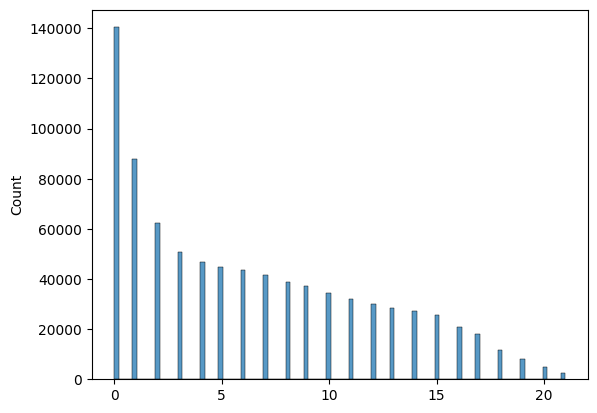

In [38]:
import matplotlib.pyplot as plt

seaborn.histplot(kmer_count)

In [46]:
from Bio import SeqIO
from tqdm import tqdm
prediction = []

i = 0

for record in tqdm(SeqIO.parse("/mnt/c/Users/zhenh/tax_data/sampled_reads.fastq", "fastq")):
    #print(record.seq)
    record_signature = sg.to_signature([str(record.seq)], data_type=bool) & filter
    print(record_signature.sum(), len(record.seq), "====")

    best_similiarity = 0
    genus_prediction = []
    for genus in bool_signature:
        similarity = (record_signature & bool_signature[genus]).sum() / record_signature.sum()
        if similarity > 0.2:
            genus_prediction.append(genus)
            print(genus, similarity)
            #best_similiarity = similarity
    
    print(genus_prediction)
    
    prediction.append(genus_prediction)
    i += 1
    if i > 20:
        break

7it [00:00, 64.20it/s]

149 8663 ====
2810280.0 0.21476510067114093
186804.0 0.35570469798657717
[2810280.0, 186804.0]
42 2129 ====
1300.0 0.2857142857142857
2810280.0 0.3333333333333333
186804.0 0.40476190476190477
[1300.0, 2810280.0, 186804.0]
65 3852 ====
2810280.0 0.49230769230769234
186804.0 0.38461538461538464
[2810280.0, 186804.0]
118 6186 ====
2810280.0 0.2966101694915254
186804.0 0.2796610169491525
[2810280.0, 186804.0]
7 790 ====
2810280.0 0.42857142857142855
186804.0 0.7142857142857143
[2810280.0, 186804.0]
95 3464 ====
2810280.0 0.35789473684210527
186804.0 0.24210526315789474
[2810280.0, 186804.0]
12 497 ====
31977.0 0.3333333333333333
909930.0 0.25
31979.0 0.25
[31977.0, 909930.0, 31979.0]
79 4043 ====
2810280.0 0.26582278481012656
186804.0 0.25316455696202533
[2810280.0, 186804.0]
56 2121 ====
1300.0 0.32142857142857145
2810280.0 0.4107142857142857
186804.0 0.21428571428571427
128827.0 0.23214285714285715
[1300.0, 2810280.0, 186804.0, 128827.0]
21 1687 ====
2810280.0 0.2857142857142857
[2810280

20it [00:00, 62.17it/s]

2810280.0 0.3333333333333333
128827.0 0.2857142857142857
[84107.0, 2810280.0, 128827.0]
13 539 ====
2810280.0 0.46153846153846156
2810281.0 0.23076923076923078
186804.0 0.3076923076923077
[2810280.0, 2810281.0, 186804.0]
16 1683 ====
2810280.0 0.375
186804.0 0.4375
31979.0 0.25
[2810280.0, 186804.0, 31979.0]
71 3710 ====
2810280.0 0.28169014084507044
[2810280.0]
11 620 ====
2810280.0 0.2727272727272727
2810281.0 0.2727272727272727
186804.0 0.45454545454545453
31979.0 0.2727272727272727
[2810280.0, 2810281.0, 186804.0, 31979.0]
16 496 ====
1300.0 0.3125
186804.0 0.375
[1300.0, 186804.0]
82 4048 ====
2810280.0 0.3170731707317073
186804.0 0.2682926829268293
[2810280.0, 186804.0]
172 5747 ====
1300.0 0.22674418604651161
[1300.0]
